# E_Commerce_Project


### Index

1. Import the required libraries
2. Read and understand the data
3. Exploratory Data Analysis
4. Multiple Linear Regression Model Building
5. Making Predictions for Test data
6. Calculating R-squared value

### 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

### 2. Reading the data

In [4]:
ecomm = pd.read_csv("Sample-Superstore.csv", sep=",", encoding="latin1")


###### The error message (e_c = pd.read_csv("Sample-Superstore.csv", sep=","): It was an issue with decoding the CSV file using the 'utf-8' encoding. This error can occur if the CSV file contains characters or byte sequences that are not compatible with the specified encoding.

###### To resolve this issue, you can try specifying a different encoding when reading the CSV file using the encoding parameter in the pd.read_csv() function. One common alternative encoding to try is 'latin1'.

###### By using 'latin1' as the encoding, you might be able to read the file successfully without encountering the UnicodeDecodeError. If this doesn't work, you can also try other encodings such as 'utf-16', 'cp1252', or 'ISO-8859-1' depending on the character set used in the CSV file.

In [5]:
ecomm.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
ecomm.shape
# The data frame has 9994 rows and 21 columns

(9994, 21)

In [7]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

###### To convert a column to a specific data type, you can use the .astype() method in Pandas. For example, to convert an "object" column named "my_column" to "int64", you can use the following code:

###### df['my_column'] = df['my_column'].astype('int64')

In [8]:
ecomm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
ecomm.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [10]:
ecomm.tail(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.320
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


In [11]:
ecomm.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### 3.Exploratory Data Analysis (EDA)
3.1 Check for missing values

In [12]:
ecomm.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Inference : There are no missing values

3.2 Check for duplicates

In [13]:
# Print the number of duplicates in the datasets

print("Number of duplicates in e_commerce dataset: ", ecomm.duplicated().sum())

Number of duplicates in e_commerce dataset:  0


Inference : There are no duplicates

***

3.3 Check for outliers

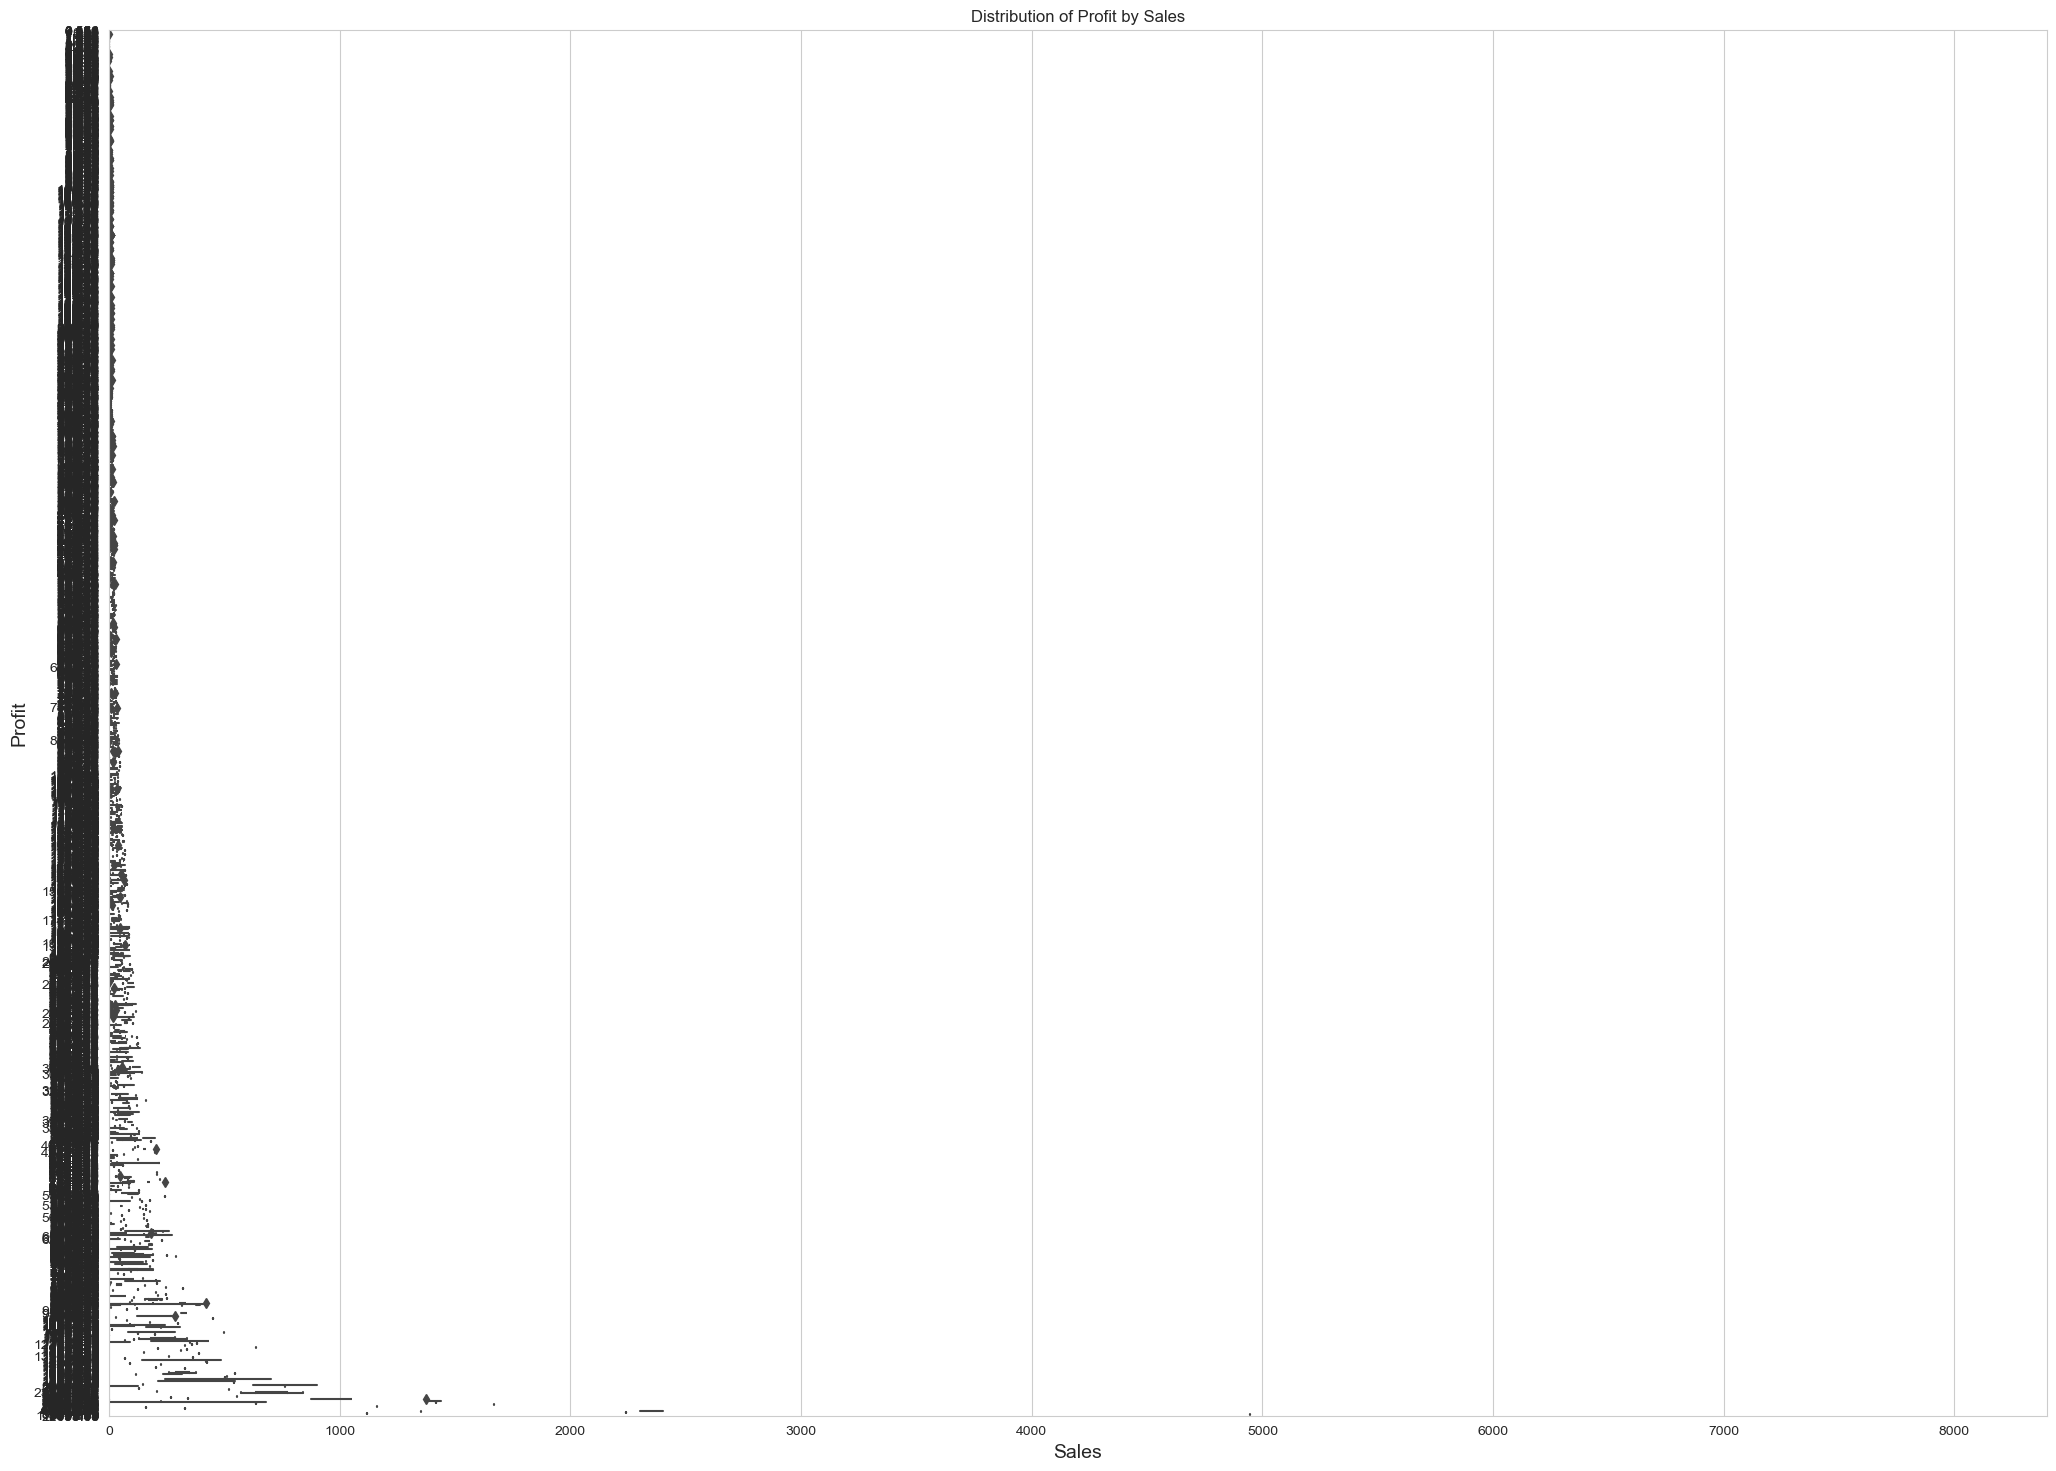

In [14]:
sns.set_style('whitegrid')
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(25, 18))
ax.set_ylim(0, 22700)
ax.set_xlim(0, 8400)
sns.boxplot(y='Sales', x='Profit', data=ecomm, orient='h')
plt.title('Distribution of Profit by Sales')
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.show()

***

Text(0, 0.5, 'Sales')

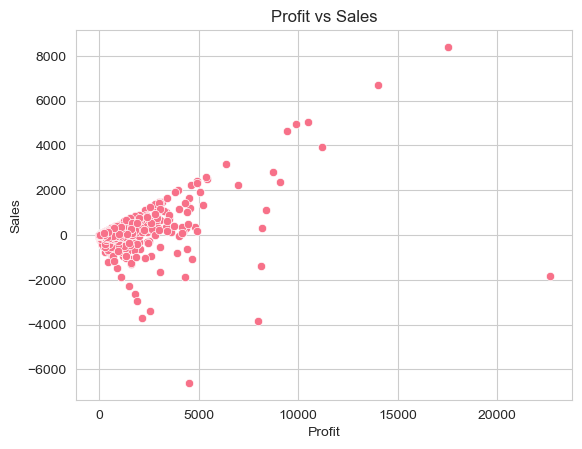

In [15]:
sns.scatterplot(data = ecomm, y='Profit', x='Sales')
plt.title('Profit vs Sales')
plt.xlabel('Profit')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

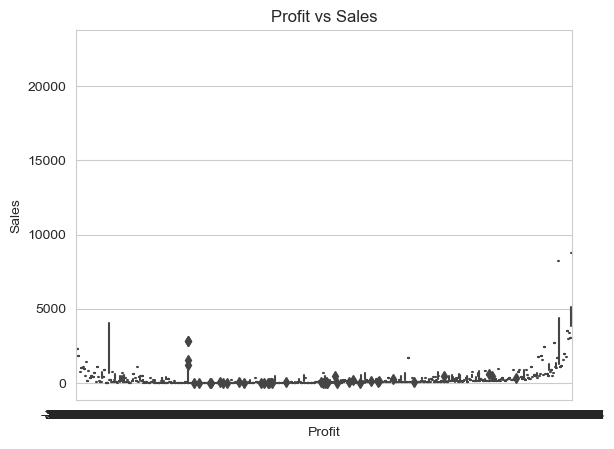

In [16]:
sns.boxplot(data = ecomm, x='Profit', y='Sales')
plt.title('Profit vs Sales')
plt.xlabel('Profit')
plt.ylabel('Sales')

In [17]:
ecomm.head(1)   

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [23]:
f = lambda x : x.split("-")[2]

# f = lambda x : x.split("-")[0]   ... in order to extract the year (0=> 1st position, 1=> 2nd position, etc.)

In [24]:
ecomm["Order ID"] = ecomm["Order ID"].apply(f)

# this creates / replaces the column "bikes["dteday"]" by the extraction of the "[0]" position from the previus lamda function.

IndexError: list index out of range

In [20]:
ecomm["Order ID"] = ecomm["Order ID"].apply(f)
# this creates / replaces the column "bikes["dteday"]" by the extraction of the "[0]" position from the previus lamda function.

KeyError: 'dteday'